# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - LIT
- Autor: Rodrigo Lima

# Parte 1. Importando os pacotes

In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Parte 2. Carregando os Dados

In [2]:
# Carregando o dataset da competição
treino = pd.read_csv('../data/training_dataset.csv')
teste  = pd.read_csv('../data/to_be_scored.csv')

# Parte 3. Feature Engineering

In [3]:
# Funcao para verificar valores missing no dataset
def check_missing(df, display = 10):
    temp_df = df.copy()
    df_nan = (temp_df.isnull().sum() / len(temp_df)) * 100
    missing_data = pd.DataFrame({'Missing n': temp_df.isnull().sum(),'% Missing' :df_nan})
    if missing_data['Missing n'].sum() == 0:
        return print('Ótimo! Não há mais valores faltantes neste dataset.')
    else:
        return missing_data.sort_values('% Missing', ascending = False).head(display)

# Funcao para preencher os dados missing de algumas colunas
def preenche_missing(df):
    
    # Remove todos os registros que tem algum dado vazio de algumas colunas
    df.dropna(axis='index', how='any', subset=['pretende_fazer_cursos_lit',
                                               'interesse_mba_lit',
                                               'certificados'], inplace=True)

    # coloca constante 0 em outras colunas com dados missing
    impute_zeros = SimpleImputer(
                                    missing_values=np.nan,
                                    strategy='constant',
                                    fill_value=0,
                                    verbose=0,
                                    copy=True
                                )
    
    impute_zeros.fit(X=df)

    # Reconstruindo um Pandas DataFrame com os resultados
    df = pd.DataFrame.from_records(
            data = impute_zeros.transform(
            X    = df
        ),
        columns=df.columns
    )    

    return df

# Funcao para trabalhar as features
def fe(df):

    # Removendo colunas unicas
    df = df.drop(['id','universidade','graduacao','organizacao','como_conheceu_lit'], axis = 1)

    return df

# Funcao para transformar features categoricas em numericas
def fe_cat_num(df):

    # Tratando variáveis categóricas com o método Pandas ``get_dummies()''
    df = pd.get_dummies(df, columns=['profissao'])

    return df

In [4]:
# Feature Engineering
treino = preenche_missing(treino)    
treino = fe(treino)   
treino = fe_cat_num(treino)    

# Verificando as colunas com dados missing do dataset
check_missing(treino, display = 15)

print(treino.shape)
treino.head(10)

Ótimo! Não há mais valores faltantes neste dataset.
(10852, 22)


,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria,profissao_0,...,profissao_Analista Senior,profissao_Assessor,profissao_Coordenador,profissao_Diretor,profissao_Engenheiro,profissao_Gerente,profissao_Outros,profissao_SEM EXPERIÊNCIA,profissao_Supervisor,profissao_Sócio/Dono/Proprietário
0,1.0,1.0,1.0,6.0,28.0,5.0,4.0,0.0,perfil6,0,...,1,0,0,0,0,0,0,0,0,0
1,0.0,0.0,1.0,6.0,66.0,36.0,34.0,0.0,perfil2,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,1.0,1.0,10.0,27.0,27.0,27.0,0.0,perfil2,0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,1.0,1.0,0.0,66.0,52.0,50.0,0.0,perfil2,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,2.0,31.0,0.0,13.0,0.0,perfil4,0,...,0,1,0,0,0,0,0,0,0,0
5,0.0,0.0,0.0,6.0,27.0,13.0,12.0,0.0,perfil2,0,...,0,0,0,0,0,0,0,0,0,0
6,0.0,0.0,1.0,9.0,51.0,49.0,49.0,0.0,perfil2,0,...,0,0,0,0,0,1,0,0,0,0
7,1.0,1.0,1.0,3.0,10.0,5.0,1.0,0.0,perfil6,0,...,0,0,0,0,0,0,0,0,0,0
8,0.0,0.0,1.0,2.0,10.0,3.0,1.0,0.0,perfil6,0,...,0,0,0,0,0,0,0,0,0,0
9,0.0,0.0,0.0,4.0,40.0,4.0,4.0,0.0,perfil6,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Feature Engineering
teste = preenche_missing(teste)    
teste = fe(teste)   
teste = fe_cat_num(teste)    
teste['profissao_0'] = 0

# Verificando as colunas com dados missing do dataset
check_missing(teste, display = 15)

print(teste.shape)
teste.head(10)

Ótimo! Não há mais valores faltantes neste dataset.
(1000, 21)


,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,profissao_Advogado,profissao_Analista,...,profissao_Assessor,profissao_Coordenador,profissao_Diretor,profissao_Engenheiro,profissao_Gerente,profissao_Outros,profissao_SEM EXPERIÊNCIA,profissao_Supervisor,profissao_Sócio/Dono/Proprietário,profissao_0
0,0,0,1,3,58,3,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,1,7,62,19,17,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,9,36,3,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1,1,9,145,61,54,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,8,33,33,29,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,1,3,29,13,11,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,1,8,521,190,160,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,1,4,10,10,10,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0,0,1,10,27,22,17,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,7,10,8,6,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Parte 4. Machine Learning

In [6]:
features = ['pretende_fazer_cursos_lit', 'interesse_mba_lit',
             'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
             'modulos_iniciados', 'modulos_finalizados', 'certificados',
             'profissao_0', 'profissao_Advogado', 'profissao_Analista',
             'profissao_Analista Senior', 'profissao_Assessor',
             'profissao_Coordenador', 'profissao_Diretor', 'profissao_Engenheiro',
             'profissao_Gerente', 'profissao_Outros', 'profissao_SEM EXPERIÊNCIA',
             'profissao_Supervisor', 'profissao_Sócio/Dono/Proprietário']

target = 'categoria'

In [7]:
# Definindo os valores para o número de folds
num_folds = 5
seed      = 337

In [8]:
X = treino[features]
y = treino[target]

# Aplicando a mesma escala nos dados
X_scaled = MinMaxScaler().fit_transform(X)

# Preparando a lista de modelos
model_gb = GradientBoostingClassifier()

kfold = KFold(n_splits = num_folds, random_state = seed)
cv_results = cross_val_score(model_gb, X_scaled, y, cv = kfold, scoring = 'f1_macro')
msg = "%s: %f (%f)" % ('GB', cv_results.mean(), cv_results.std())
print(msg)

# Realizando as previsões
gb_y_pred = cross_val_predict(model_gb, X_scaled, y, cv=num_folds)

# Relatório de Classificação
print(classification_report(y, gb_y_pred))

GB: 0.804561 (0.008147)
              precision    recall  f1-score   support

     perfil1       0.82      0.81      0.82      1708
     perfil2       0.84      0.84      0.84      2899
     perfil3       0.78      0.74      0.76       709
     perfil4       0.79      0.79      0.79      1164
     perfil5       0.81      0.77      0.79      1288
     perfil6       0.83      0.85      0.84      3084

    accuracy                           0.82     10852
   macro avg       0.81      0.80      0.81     10852
weighted avg       0.82      0.82      0.82     10852



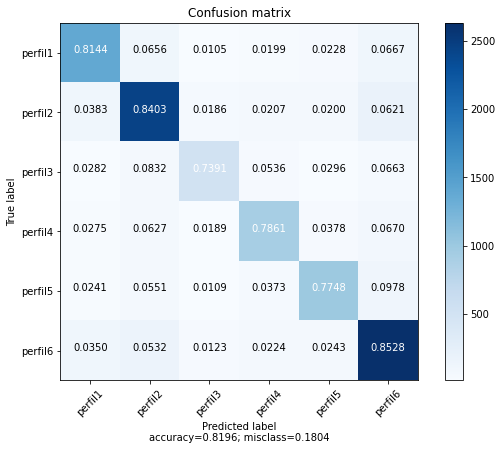

In [9]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(confusion_matrix(y, gb_y_pred), ['perfil1', 'perfil2', 'perfil3', 
                                                       'perfil4', 'perfil5', 'perfil6'])    

In [10]:
X = treino[features]
y = treino[target]

X_train_scaled = MinMaxScaler().fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_scaled, y, test_size=0.2, random_state=133)

model_gb_fit = model_gb.fit(X_train, y_train)

y_pred_val = model_gb_fit.predict(X_valid)

print(classification_report(y_valid, y_pred_val))

              precision    recall  f1-score   support

     perfil1       0.84      0.79      0.82       333
     perfil2       0.84      0.87      0.86       578
     perfil3       0.70      0.69      0.70       130
     perfil4       0.76      0.75      0.75       244
     perfil5       0.83      0.80      0.81       250
     perfil6       0.84      0.86      0.85       636

    accuracy                           0.82      2171
   macro avg       0.80      0.79      0.80      2171
weighted avg       0.82      0.82      0.82      2171



In [11]:
X_teste = MinMaxScaler().fit_transform(teste)

y_pred = model_gb_fit.predict(X_teste)

teste['target'] = y_pred
teste.tail()

,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,profissao_Advogado,profissao_Analista,...,profissao_Coordenador,profissao_Diretor,profissao_Engenheiro,profissao_Gerente,profissao_Outros,profissao_SEM EXPERIÊNCIA,profissao_Supervisor,profissao_Sócio/Dono/Proprietário,profissao_0,target
995,0,0,1,2,245,63,45,1,0,0,...,1,0,0,0,0,0,0,0,0,perfil1
996,1,1,1,8,163,111,96,0,0,0,...,0,0,0,0,0,0,0,0,0,perfil2
997,1,1,1,9,56,10,4,0,0,0,...,0,0,0,1,0,0,0,0,0,perfil5
998,1,1,1,9,138,60,30,0,0,0,...,0,0,0,0,1,0,0,0,0,perfil2
999,0,0,1,9,22,20,19,0,1,0,...,0,0,0,0,0,0,0,0,0,perfil2


In [12]:
teste['target'].value_counts()

perfil2    337
perfil6    268
perfil1    143
perfil4    122
perfil3     68
perfil5     62
Name: target, dtype: int64

In [16]:
teste.to_csv('../submission/results.csv',index=False)

In [14]:
# Carregando o dataset da competição
#versao_0 = pd.read_csv('../submission/results_v0.csv')

In [15]:
#versao_0['target'].value_counts()

perfil6    297
perfil2    249
perfil1    148
perfil4    123
perfil5    122
perfil3     61
Name: target, dtype: int64